In [2]:
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import savgol_filter
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

plt.style.use('bmh') # for style ;)

In [3]:
cd /Users/rrrod/FFC_4

c:\Users\rrrod\FFC_4


In [4]:
phases = ['/Users/rrrod/FFC_4/data/obs_042424/Phase1', '/Users/rrrod/FFC_4/data/obs_042424/Phase2']
files = [file for directory in phases for file in glob.glob(f'{directory}/*.npz')]
table = pd.read_csv('Leusch_Stuff/RA_Sorted.csv')

In [5]:
file_len = len(files)
print('Number of files imported:', file_len) # confirms all files are loaded
print()
files # lists all files loaded

Number of files imported: 292



['/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec100_L180_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec101_L161_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec102_L175_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec103_L134_B37.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec104_L138_B40.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec105_L170_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec106_L143_B44.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec107_L157_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec109_L166_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec10_L138_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec110_L147_B47.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec111_L180_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec112_L161_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec113_L175_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase1\\spec

In [6]:
# noise files
noises = glob.glob('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/*.npz')

# gain files with noise
gain0_spec = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase1/spec3_L134_B20.npz')
gain0_noise = np.load('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec3_L134_B20.npz')
gain1_spec = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase2/spec167_L115_B47.npz')
gain1_noise = np.load('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec167_L115_B47.npz')
gain1_spec = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase2/spec320_L111_B20.npz')
gain2_noise = np.load('/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec320_L111_B20.npz')

In [7]:
''' 
    sort files by the original "galactic index" 
    which ordered the coordinates in galactic
'''
leusch_data = sorted(files, key=lambda x: np.load(x)['coords'][5])

In [8]:
noise_len = len(noises)
print('Number of noise files imported:', noise_len) # confirms all files are loaded
print()
noises # lists all files loaded

Number of noise files imported: 9



['/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec164_L115_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec165_L111_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec167_L115_B47.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec319_L115_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec320_L111_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec321_L115_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec322_L120_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec323_L120_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Noise_Spectra\\NoiseSpec3_L134_B20.npz']

In [9]:
len_testdata = len(leusch_data)
print('Number of noise files imported:', len_testdata) # confirms all files are loaded
print()
leusch_data # lists all files loaded

Number of noise files imported: 292



['/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec292_L60_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec286_L60_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec277_L60_B27.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec270_L60_B30.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec261_L60_B34.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec252_L60_B37.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec244_L60_B40.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec236_L60_B44.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec229_L60_B47.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec221_L60_B51.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec210_L60_B54.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec200_L60_B57.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec295_L65_B20.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec288_L65_B23.npz',
 '/Users/rrrod/FFC_4/data/obs_042424/Phase2\\spec281_L65_B27.n

In [10]:
# make length object, empty arrays
len_testdata = len(leusch_data) 
pwr0 = [] 
pwr1 = []
unix = []
coordinates = []
alt_az = []
jd = []
galactic = []

# iterate through all 'testdata' object 
# grab info as well 
for n in range(len_testdata):
    test_dataFiles = np.load(leusch_data[n])
    # spectra 
    pwr0.append(test_dataFiles["data0"]) # Append data
    pwr1.append(test_dataFiles["data1"])
    unix.append(test_dataFiles['time'][()])
    coordinates.append(test_dataFiles['coords'])
    galactic.append([test_dataFiles['coords'][1], test_dataFiles['coords'][2]])
    jd.append(test_dataFiles['jd'])

In [11]:
# shifting
for i in range(len(pwr0)): 
    pwr0[i] = np.fft.fftshift(pwr0[i])

for i in range(len(pwr1)):
    pwr1[i] = np.fft.fftshift(pwr1[i])

# frequency
freqs = 1420 + np.fft.fftshift(np.fft.fftfreq(len(pwr0[i]), 1/3.2))

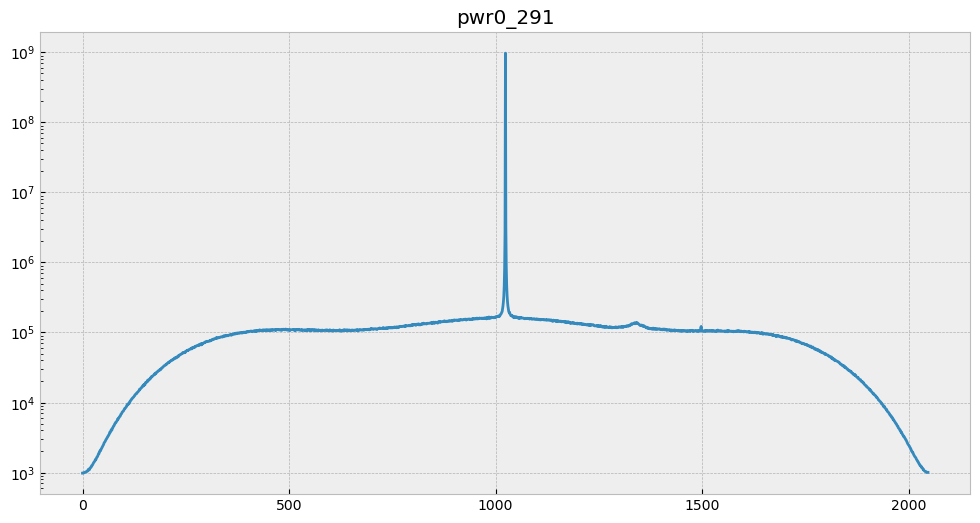

In [12]:
# plotting that shit
plt.figure(figsize=(12, 6))
plt.semilogy(pwr0[10])
plt.title(f'pwr0_{i}')
plt.show()

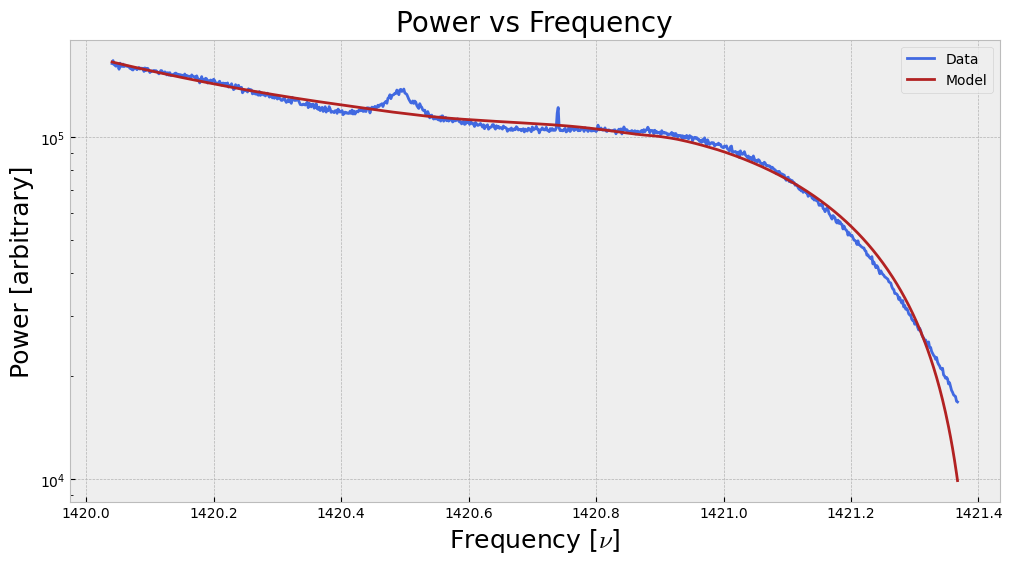

In [13]:
# defining some stuff
model = savgol_filter(pwr0[10], 499, 3) # fitting a model
pwr010_pos = pwr0[10][1050:1900] # observation data
model_pos = savgol_filter(pwr010_pos, 500, 3) # model

# plotting!
plt.figure(figsize=(12, 6))
plt.semilogy(freqs[1050:1900], pwr010_pos, label='Data', color='royalblue') # observation data
plt.semilogy(freqs[1050:1900], model_pos, label='Model', color='firebrick') # model
plt.title('Power vs Frequency', fontsize=20) # gives it a sick title
plt.xlabel(r'Frequency [$\nu$]', fontsize=18)
plt.ylabel(r'Power [arbitrary]', fontsize=18)
plt.legend()
plt.show()

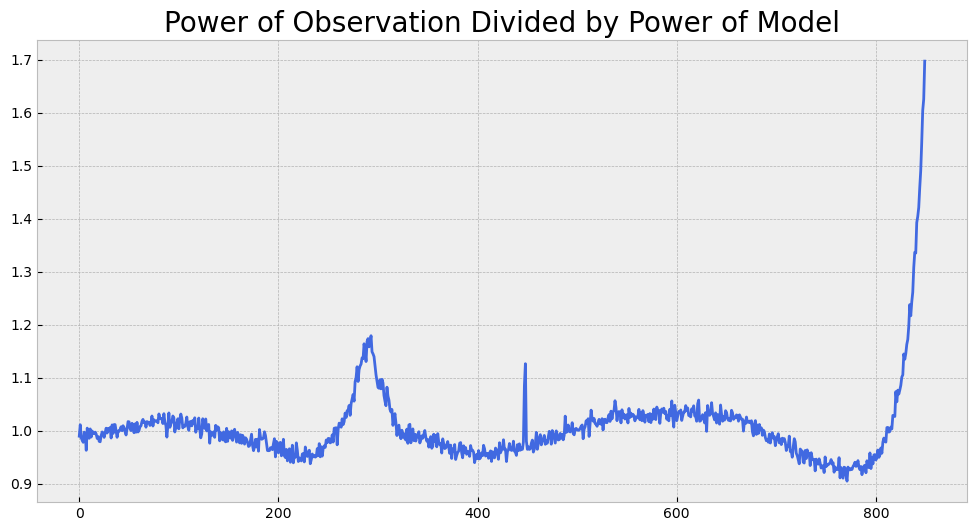

In [14]:
divided = pwr010_pos/model_pos # another defined variable

# plotting!
plt.figure(figsize=(12, 6))
plt.plot(divided, label='Data', color='royalblue') # observation data
plt.title('Power of Observation Divided by Power of Model', fontsize=20) # gives it a sick title
plt.show()

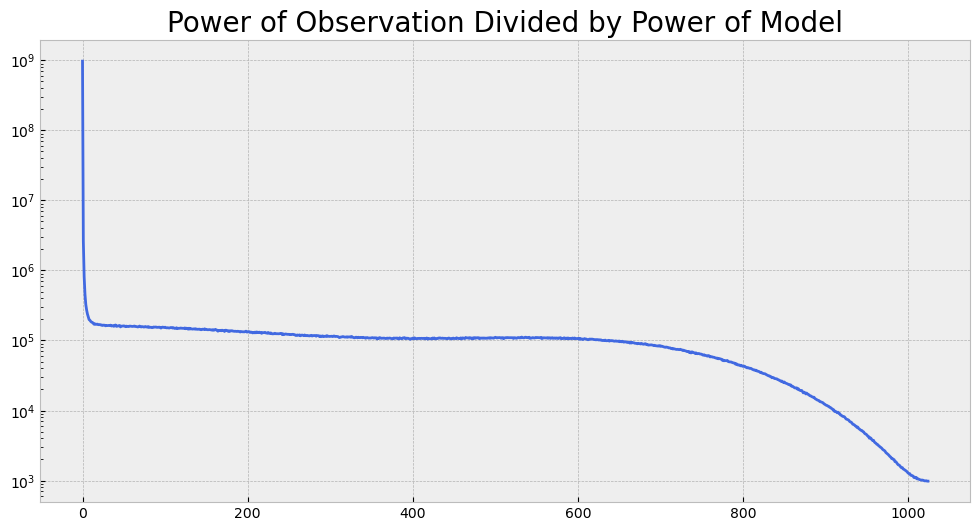

In [15]:
# variables to take half of set and flip it
switch_set = pwr0[10][0:1025]
switch_index = np.arange(0, 1025, 1)
switched = np.flip(switch_set)

# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(switched, label='Data', color='royalblue') # observation data
plt.title('Power of Observation Divided by Power of Model', fontsize=20) # gives it a sick title
plt.show()

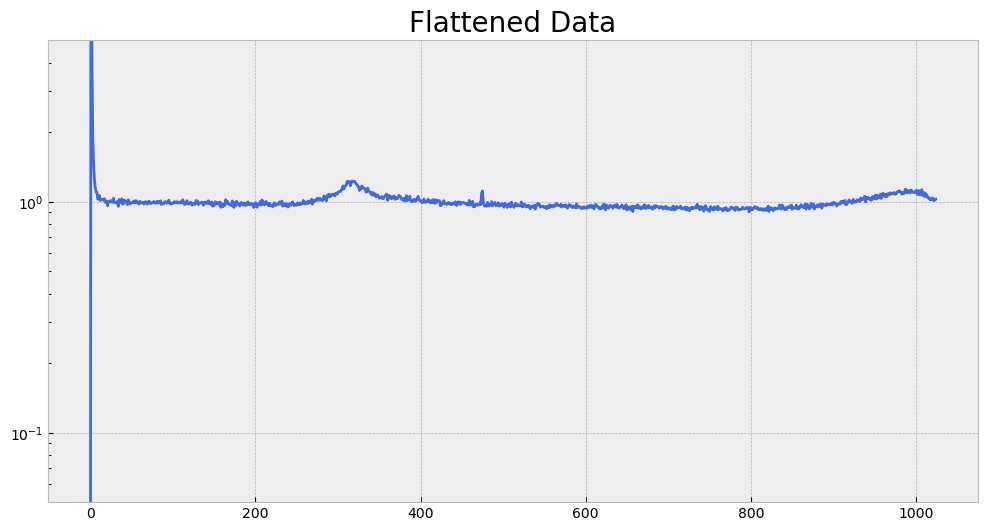

In [16]:
# flattens the data
pwr0_flat = pwr0[10][1023:2048]/switched

# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(pwr0_flat, label='Data', color='royalblue') # observation data
plt.ylim(5e-2, 0.5e1)
plt.title('Flattened Data', fontsize=20) # gives it a sick title
plt.show()

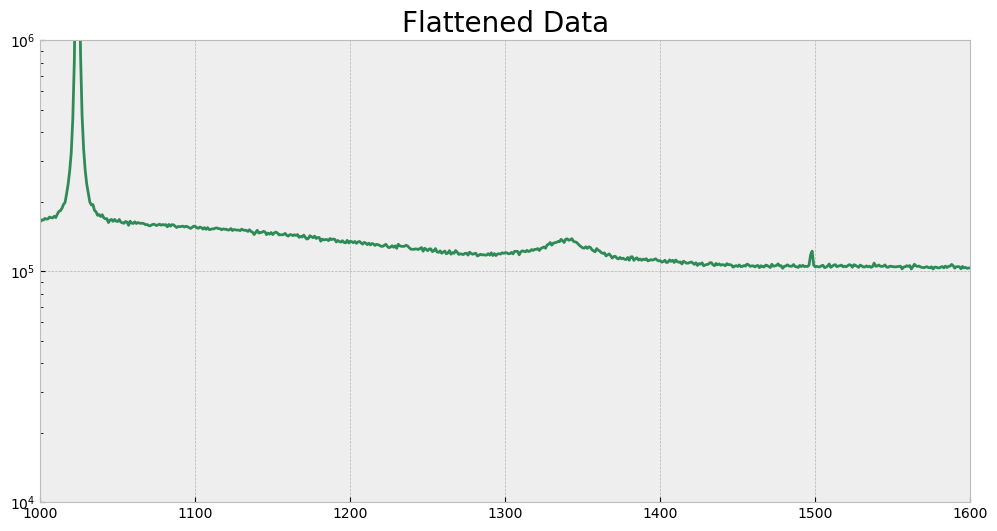

In [17]:
# flatten... again?
new_flat = pwr0[10].flatten()

# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(new_flat, color='seagreen')
plt.xlim(1000, 1600)
plt.ylim(1e4, 1e6)
plt.title('Flattened Data', fontsize=20) # gives it a sick title
plt.show()

In [18]:
# flattens the index
flatter = np.arange(1023, 2048, 1)
print('Length of flattened index:', len(flatter)) 


Length of flattened index: 1025


In [19]:
divided0 = [] 
chunked0 = []
for i in range(len(pwr0)):
    spectra = pwr0[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:600]
    divided0.append(flatter)
    chunked0.append(chunked)

divided1 = []
chunked1 = []
for i in range(len(pwr1)):
    spectra = pwr1[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[50:600]
    divided1.append(flatter)
    chunked1.append(chunked)
    
d0 = len(divided0[0])
c0 = len(chunked0[0])
d1 = len(divided1[0])
c1 = len(chunked1[0])

print('Length of divided0, chunked0, divided1, and chunked1:', d0,'|', c0, '|', d1, '|', c1, 'in that order.')

Length of divided0, chunked0, divided1, and chunked1: 1024 | 595 | 1024 | 550 in that order.


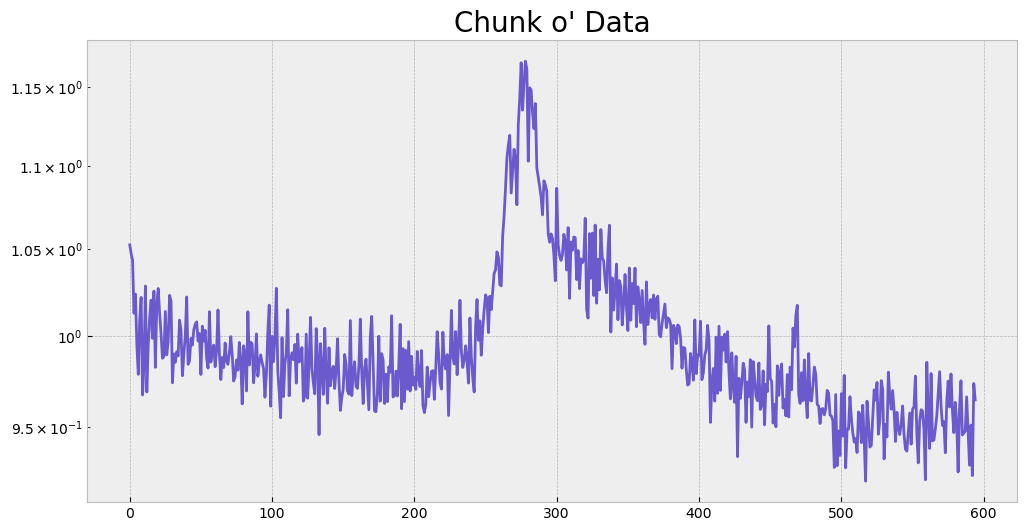

In [20]:
# plotting
plt.figure(figsize=(12, 6))
plt.semilogy(chunked0[30], color='slateblue')
plt.title("Chunk o' Data", fontsize=20) # gives it a sick title
plt.show()

In [21]:
the300 = np.load('/Users/rrrod/FFC_4/data/obs_042424/Phase2/spec323_L120_B20.npz', allow_pickle=True)

print(the300['missed'])


{1: [51.53828711063656, 1.1991023186681529], 2: [62.08904253931914, 4.403520617876413], 4: [48.172171767721366, 1.8413168937712994], 12: [44.8338517354441, 2.2868666723494537], 46: [41.678166935480085, 2.452720593232178], 149: [39.13757190290301, 3.1899928026737085]}


In [22]:
table

,Unnamed: 0,L,B,RA,DEC,Galactic_Index
0,0,124.4,20.0,23.851192,82.746098,168
1,1,124.4,23.4,32.778248,86.042542,169
2,2,129.0,20.0,52.084066,80.962227,180
3,3,133.6,20.0,69.006710,77.908980,192
4,4,129.0,23.4,69.993942,83.367395,181
...,...,...,...,...,...,...
319,319,115.2,23.4,309.232324,82.078465,145
320,320,110.6,20.0,312.501293,76.649154,132
321,321,115.2,20.0,326.412516,79.953801,144
322,322,119.8,23.4,334.954938,85.318438,157


In [23]:
len_gal = len(galactic)
print('Number of noise files imported:', len_gal) # confirms all files are loaded
print()
galactic # lists all files loaded

Number of noise files imported: 292



[[60.0, 20.0],
 [60.0, 23.4],
 [60.0, 26.8],
 [60.0, 30.2],
 [60.0, 33.599999999999994],
 [60.0, 36.99999999999999],
 [60.0, 40.39999999999999],
 [60.0, 43.79999999999999],
 [60.0, 47.19999999999999],
 [60.0, 50.59999999999999],
 [60.0, 53.99999999999999],
 [60.0, 57.399999999999984],
 [64.6, 20.0],
 [64.6, 23.4],
 [64.6, 26.8],
 [64.6, 30.2],
 [64.6, 33.599999999999994],
 [64.6, 36.99999999999999],
 [64.6, 40.39999999999999],
 [64.6, 43.79999999999999],
 [64.6, 47.19999999999999],
 [64.6, 50.59999999999999],
 [64.6, 53.99999999999999],
 [64.6, 57.399999999999984],
 [69.19999999999999, 20.0],
 [69.19999999999999, 23.4],
 [69.19999999999999, 26.8],
 [69.19999999999999, 30.2],
 [69.19999999999999, 33.599999999999994],
 [69.19999999999999, 36.99999999999999],
 [69.19999999999999, 40.39999999999999],
 [69.19999999999999, 43.79999999999999],
 [69.19999999999999, 47.19999999999999],
 [69.19999999999999, 50.59999999999999],
 [69.19999999999999, 53.99999999999999],
 [69.19999999999999, 57.3999

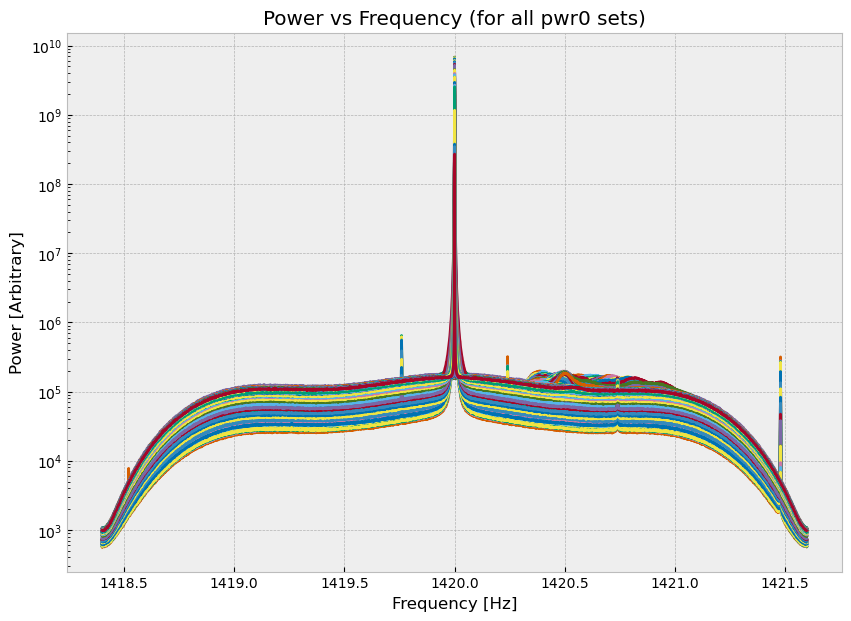

In [24]:
'''
“In the middle of the journey of our life I found myself 
within a dark woods where the straight way was lost.”
                                    - Dante's Inferno
'''
plt.figure(figsize = (10, 7))
for i in range(len(pwr0)):
    plt.semilogy(freqs, pwr0[i])
plt.title('Power vs Frequency (for all pwr0 sets)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [Arbitrary]')
plt.show()

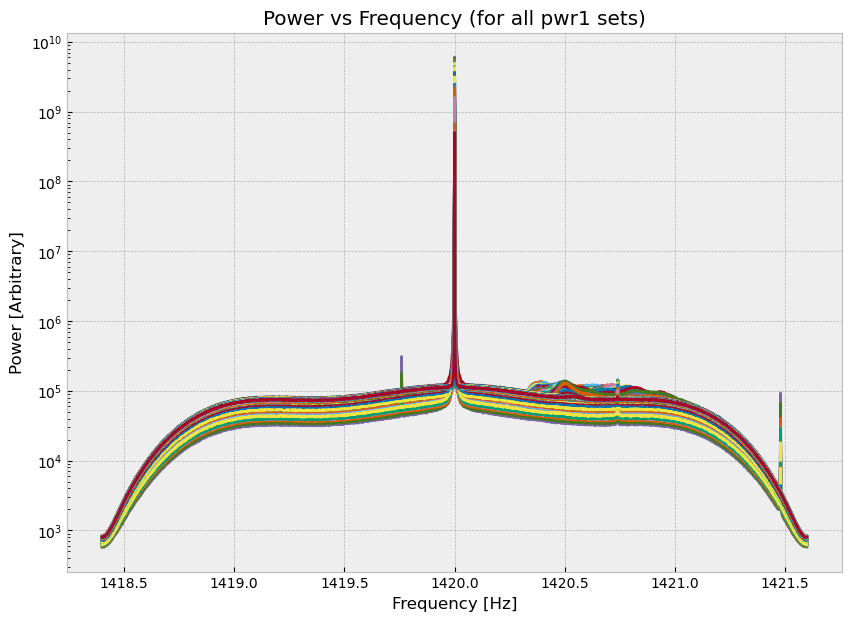

In [25]:
''' 
"Leave all hope, ye who enter here!"
                - Dante's Inferno
'''
plt.figure(figsize = (10, 7))
for i in range(len(pwr1)):
    plt.semilogy(freqs, pwr1[i])
plt.title('Power vs Frequency (for all pwr1 sets)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [Arbitrary]')
plt.show()

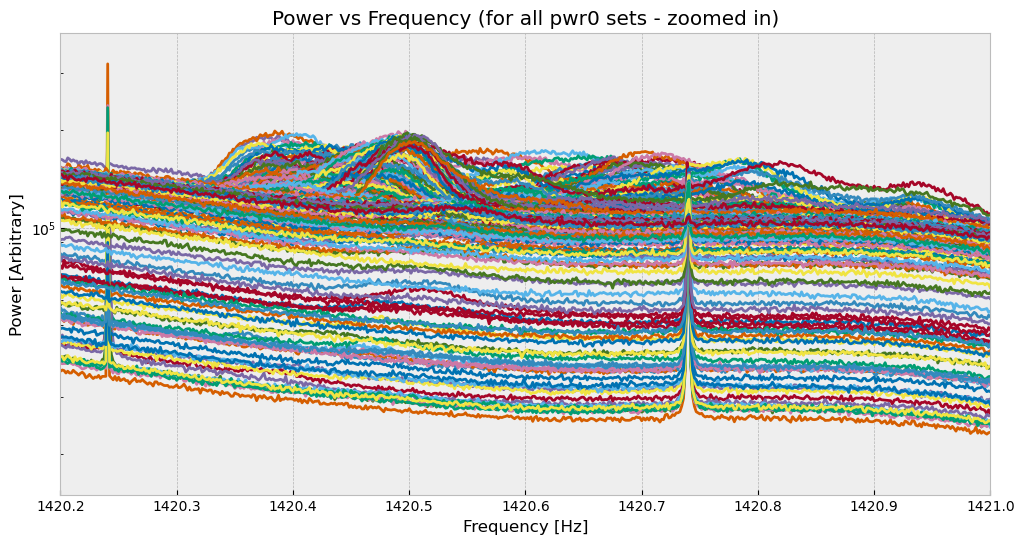

In [26]:
''' 
"Thence we came forth to rebehold the stars."
                        - Dante's Inferno
'''
plt.figure(figsize = (12, 6))
for i in range(len(pwr0)):
    plt.semilogy(freqs, pwr0[i])
plt.title('Power vs Frequency (for all pwr0 sets - zoomed in)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [Arbitrary]')
plt.xlim(1420.2, 1421)
plt.ylim(1.5e4, 4e5)
plt.show()


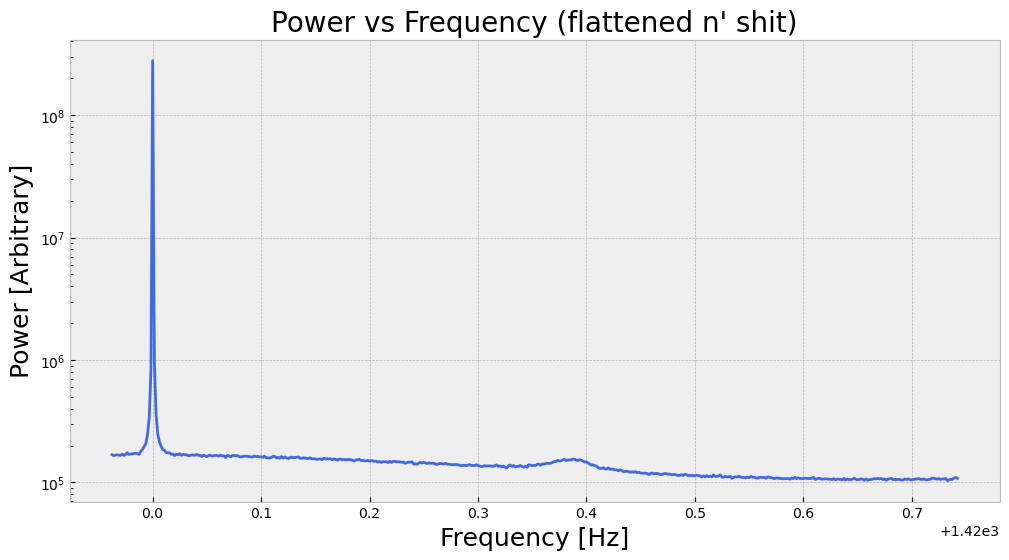

In [27]:
freqs2 = freqs[1000:1500]

plt.figure(figsize = (12, 6))
plt.semilogy(freqs2, pwr0[0][1000:1500], color='royalblue')
plt.title("Power vs Frequency (flattened n' shit)", fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Power [Arbitrary]', fontsize=18)
plt.show()



# Beyond here is some bullshit 

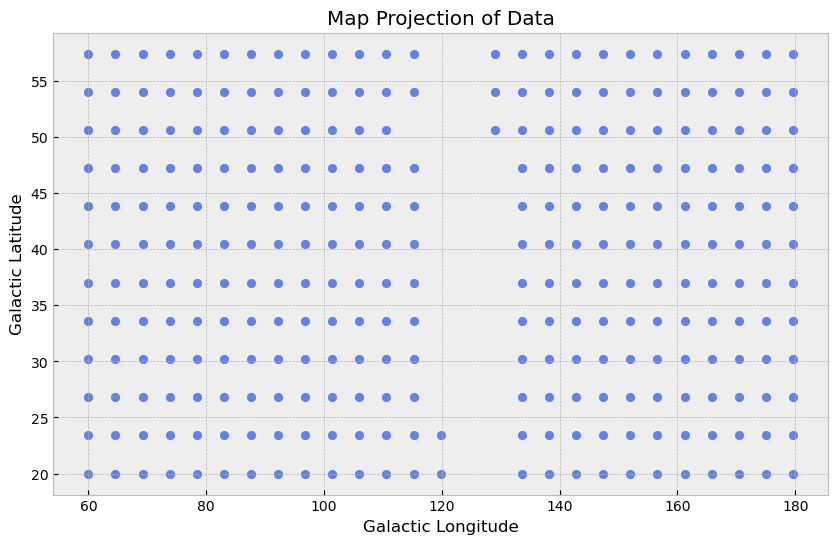

In [54]:
# Extracting galactic coordinates
galactic_longitudes = [coord[0] for coord in galactic]
galactic_latitudes = [coord[1] for coord in galactic]

# Plotting the map projection
plt.figure(figsize=(10, 6))
plt.scatter(galactic_longitudes, galactic_latitudes, c='royalblue', marker='o', alpha=0.8)
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.title('Map Projection of Data')
plt.grid(True)
plt.show()


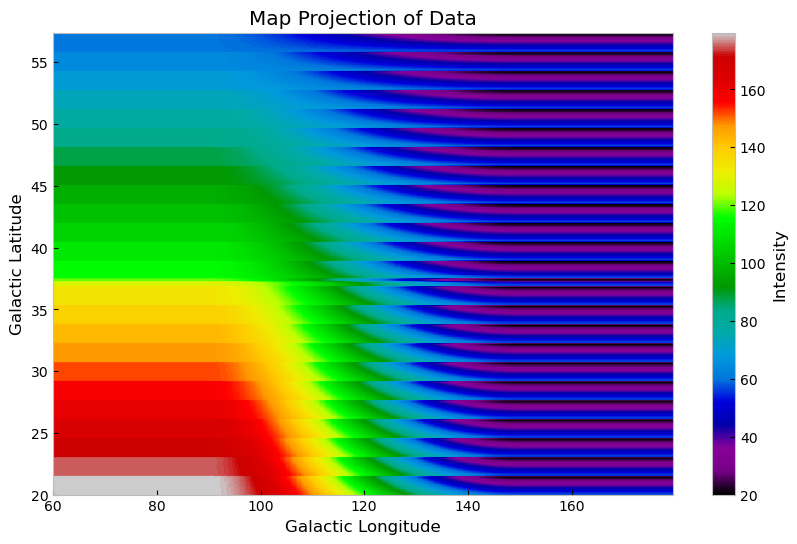

In [48]:
data = np.array(galactic)

# plots the map projection
plt.figure(figsize=(10, 6))
plt.imshow(data, extent=[min(galactic_longitudes), max(galactic_longitudes), min(galactic_latitudes), max(galactic_latitudes)], aspect='auto', cmap='nipy_spectral')
plt.colorbar(label='Intensity')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.title('Map Projection of Data')
plt.grid(False)
plt.show()


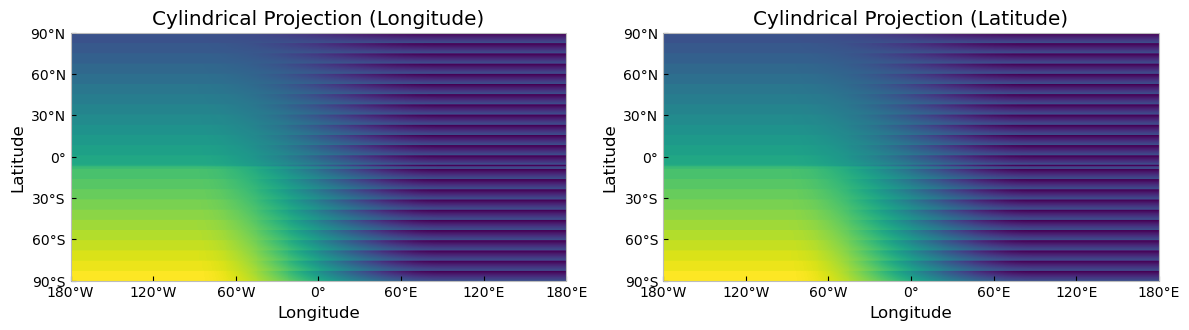

In [30]:
# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projections
projection = ccrs.PlateCarree()

# Create a new figure and axis for each plot
plt.figure(figsize=(12, 6))

# Plot cylindrical projection (longitude)
ax1 = plt.subplot(1, 2, 1, projection=projection)
ax1.set_title('Cylindrical Projection (Longitude)')
img_longitude = ax1.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax1.grid()

# Plot cylindrical projection (latitude)
ax2 = plt.subplot(1, 2, 2, projection=projection)
ax2.set_title('Cylindrical Projection (Latitude)')
img_latitude = ax2.imshow(data_latitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax2.grid(False)

plt.tight_layout()
plt.show()


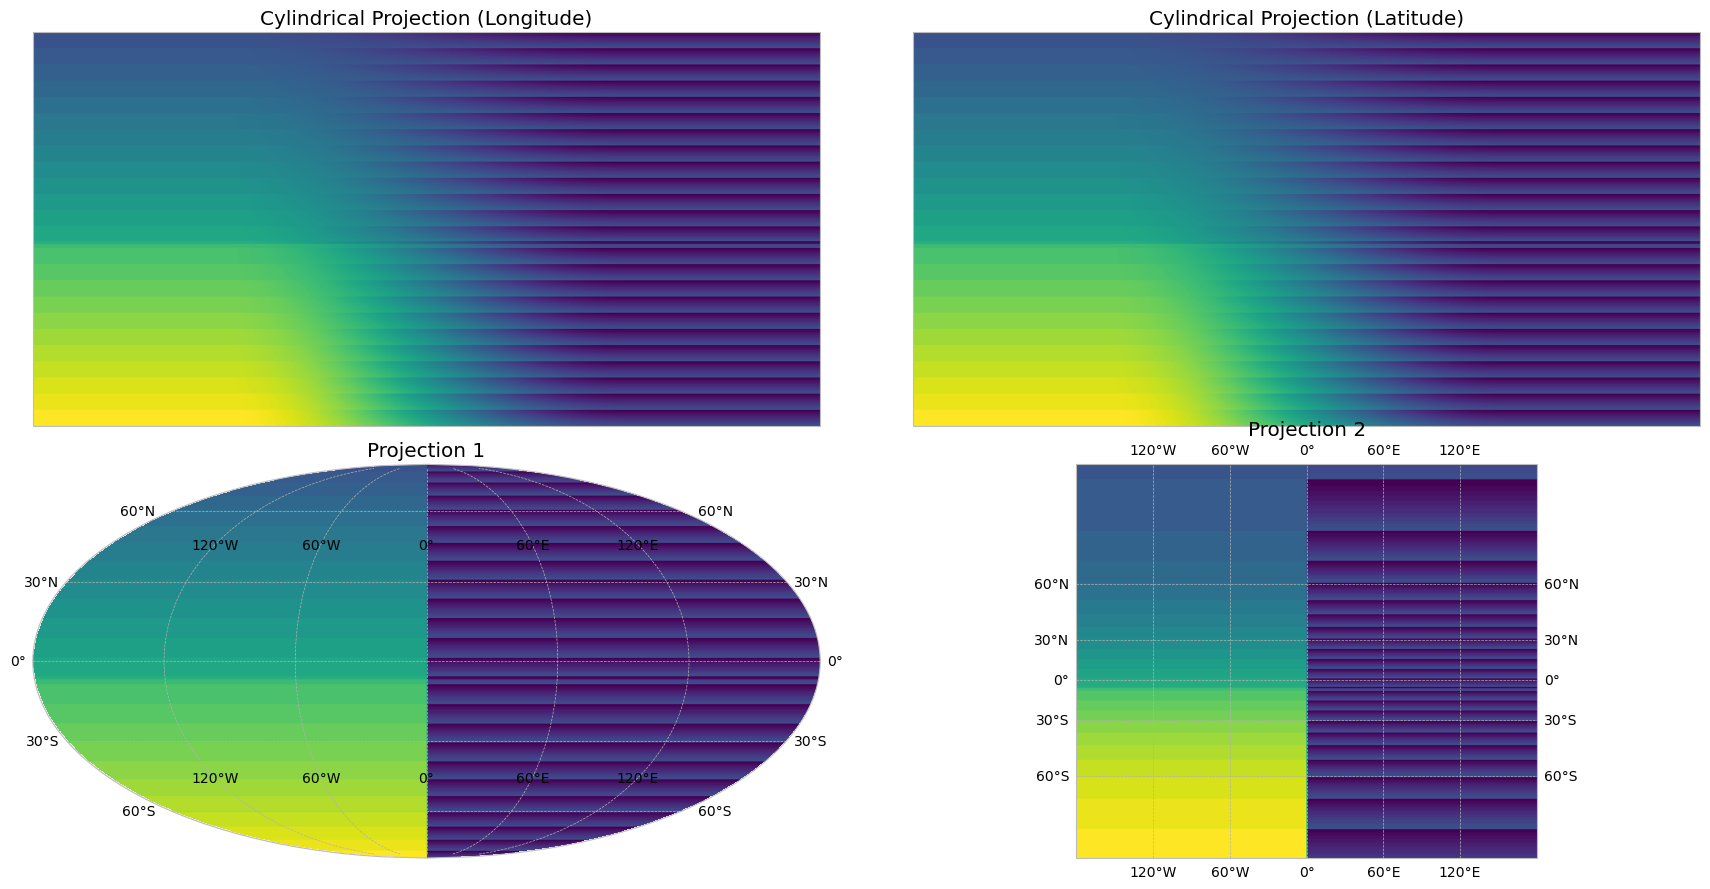

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projections
projection = ccrs.PlateCarree()

# Create a new figure and axis for each plot
plt.figure(figsize=(18, 9))

# Plot cylindrical projection (longitude)
ax1 = plt.subplot(2, 2, 1, projection=projection)
ax1.set_title('Cylindrical Projection (Longitude)')
img_longitude = ax1.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.grid()

# Plot cylindrical projection (latitude)
ax2 = plt.subplot(2, 2, 2, projection=projection)
ax2.set_title('Cylindrical Projection (Latitude)')
img_latitude = ax2.imshow(data_latitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.grid(False)

# Plot additional projections
projections = [ccrs.Mollweide(), ccrs.Mercator()]

for i, proj in enumerate(projections, start=3):
    ax = plt.subplot(2, 2, i, projection=proj)
    ax.set_title(f'Projection {i-2}')
    ax.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='viridis')
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')

plt.tight_layout()
plt.show()


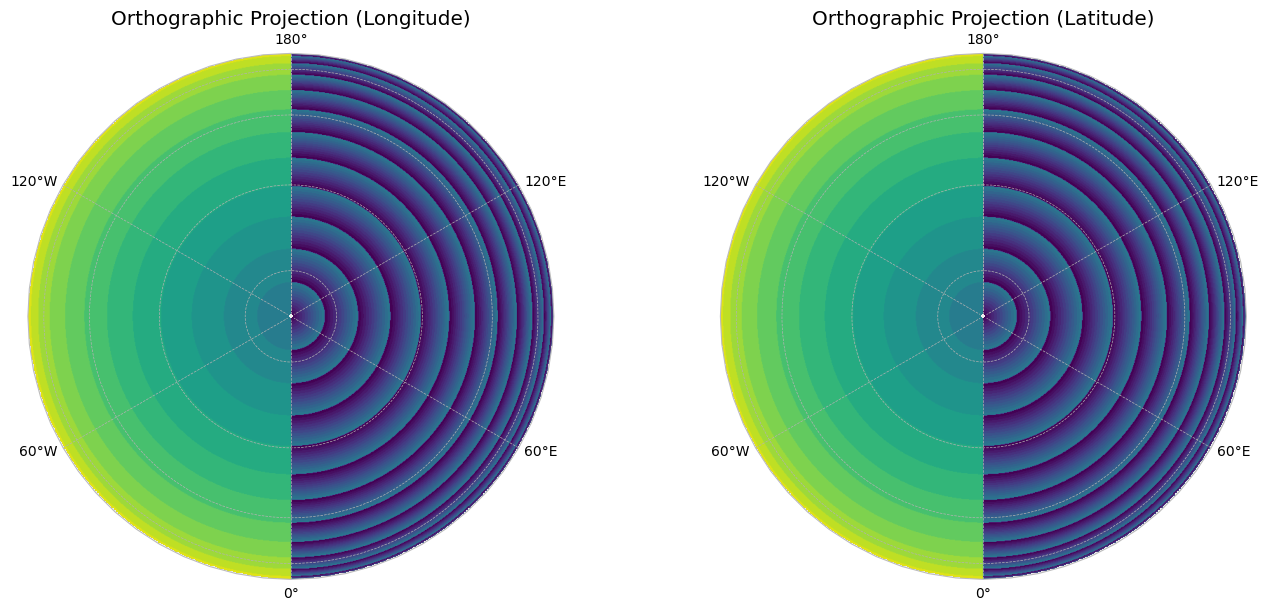

In [32]:
# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projections
projection = ccrs.Orthographic(central_latitude=90)
data_crs = ccrs.PlateCarree()

# Create a new figure and axis for each plot
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), subplot_kw={'projection': projection})

# Plot orthographic projection (longitude)
axes[0].set_title('Orthographic Projection (Longitude)')
img_longitude = axes[0].imshow(data_longitude, extent=(-180, 180, -90, 90), transform=data_crs, cmap='viridis')
axes[0].gridlines(crs=data_crs, draw_labels=True, linestyle='--')

# Plot orthographic projection (latitude)
axes[1].set_title('Orthographic Projection (Latitude)')
img_latitude = axes[1].imshow(data_latitude, extent=(-180, 180, -90, 90), transform=data_crs, cmap='viridis')
axes[1].gridlines(crs=data_crs, draw_labels=True, linestyle='--')

plt.tight_layout()
plt.show()


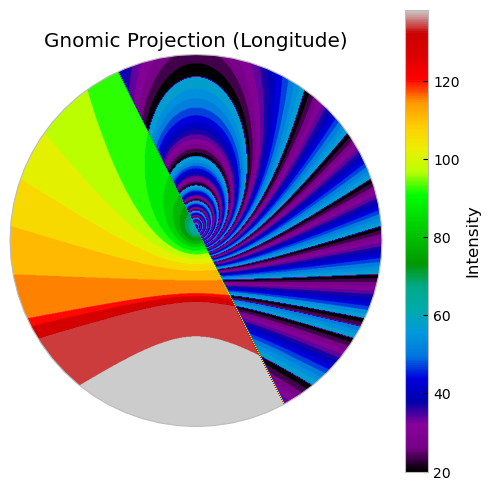

In [33]:
# Assuming you have longitude and latitude arrays
NLON, NLAT = len(galactic[0]), len(galactic)  # Number of pixels in longitude and latitude
xs, ys = np.indices((NLAT, NLON))  # Get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON  # Scale [0:NLON) to [-180:180)

# Replace this with your actual data
data_longitude = np.array(galactic)
data_latitude = np.array(galactic)

# Create Cartopy projection
projection = ccrs.Gnomonic(central_latitude=60, central_longitude=-30)

# Create a new figure and axis
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=projection)

# Plot the Gnomonic projection
ax.set_title('Gnomic Projection (Longitude)')

img = ax.imshow(data_longitude, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap='nipy_spectral')

plt.colorbar(img, orientation='vertical', label='Intensity')

plt.show()
